In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

# fr = pd.read_csv('../data/final_clean.csv')
fr = pd.read_csv('../data/final_clean_r2.csv')

## Select Numeric Columns Only

In [2]:
columns = [
    #'loan_amount',
    #'property_value',
    'income',
    'interest_rate',
    'total_loan_costs',
    'loan_to_value_ratio',
    #'origination_costs',
    #'discount_points',
    #'lender_credits',
    'loan_term',
    'intro_rate_period',
    'total_units',
    'tract_minority_population_percent',
    'tract_population',
    'tract_to_msa_income_percentage',
    'tract_owner_occupied_units',
    'tract_one_to_four_family_homes',
    'tract_median_age_of_housing_units',
    #'debt_to_income_ratio'
]

X = fr[columns]

## Standard Scale the Data

In [3]:
X = StandardScaler().fit_transform(X)

## Perform 2D PCA

array([2.77266941, 4.25002271])

<Axes: xlabel='0', ylabel='1'>

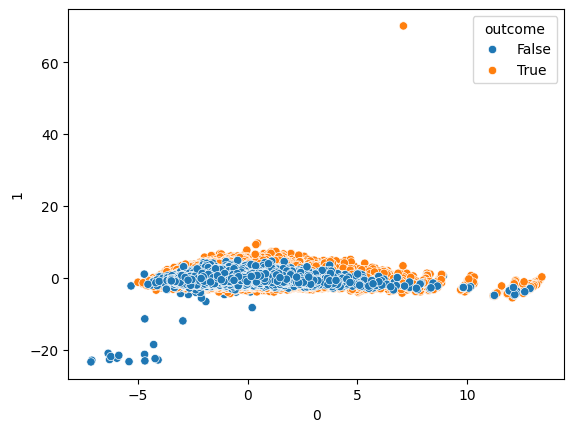

In [4]:
pca2d = PCA(n_components=2)
result2d = pd.DataFrame(pca2d.fit_transform(X))
result2d['outcome']  = fr['outcome'].astype(bool)

display(
    np.cumsum(pca2d.explained_variance_) #eigenvalues
)

sns.scatterplot(
    data=result2d,
    x=0,y=1,hue='outcome'
)

In [5]:
np.cumsum(pca2d.explained_variance_ratio_)

array([0.21328121, 0.32692322])

## 3D PCA

In [6]:
pca3d = PCA(n_components=3)
result3d = pd.DataFrame(pca3d.fit_transform(X))
result3d['outcome']  = fr['outcome'].astype(bool)
display(
    np.cumsum(pca3d.explained_variance_) #eigenvalues
)
result3d

array([2.77266941, 4.25002271, 5.47534413])

,0,1,2,outcome
0,2.538209,2.871952,2.496249,True
1,1.075105,7.273312,1.093027,True
2,1.492309,4.086232,1.354930,True
3,13.091950,-1.111687,2.902511,True
4,-0.304336,3.228502,-0.246665,True
...,...,...,...,...
203316,-2.113375,-0.180653,0.073906,False
203317,-1.075791,-1.045864,1.461882,False
203318,2.234817,0.197780,0.589424,False
203319,-1.196970,-0.545500,-0.351200,False


In [27]:
nPCA = PCA()
q = nPCA.fit_transform(result3d[result3d.columns[0:3]].T)


array([6.31315339e-01, 3.68684661e-01, 3.75506857e-30])

In [7]:
np.cumsum(pca3d.explained_variance_ratio_)

array([0.21328121, 0.32692322, 0.42117825])

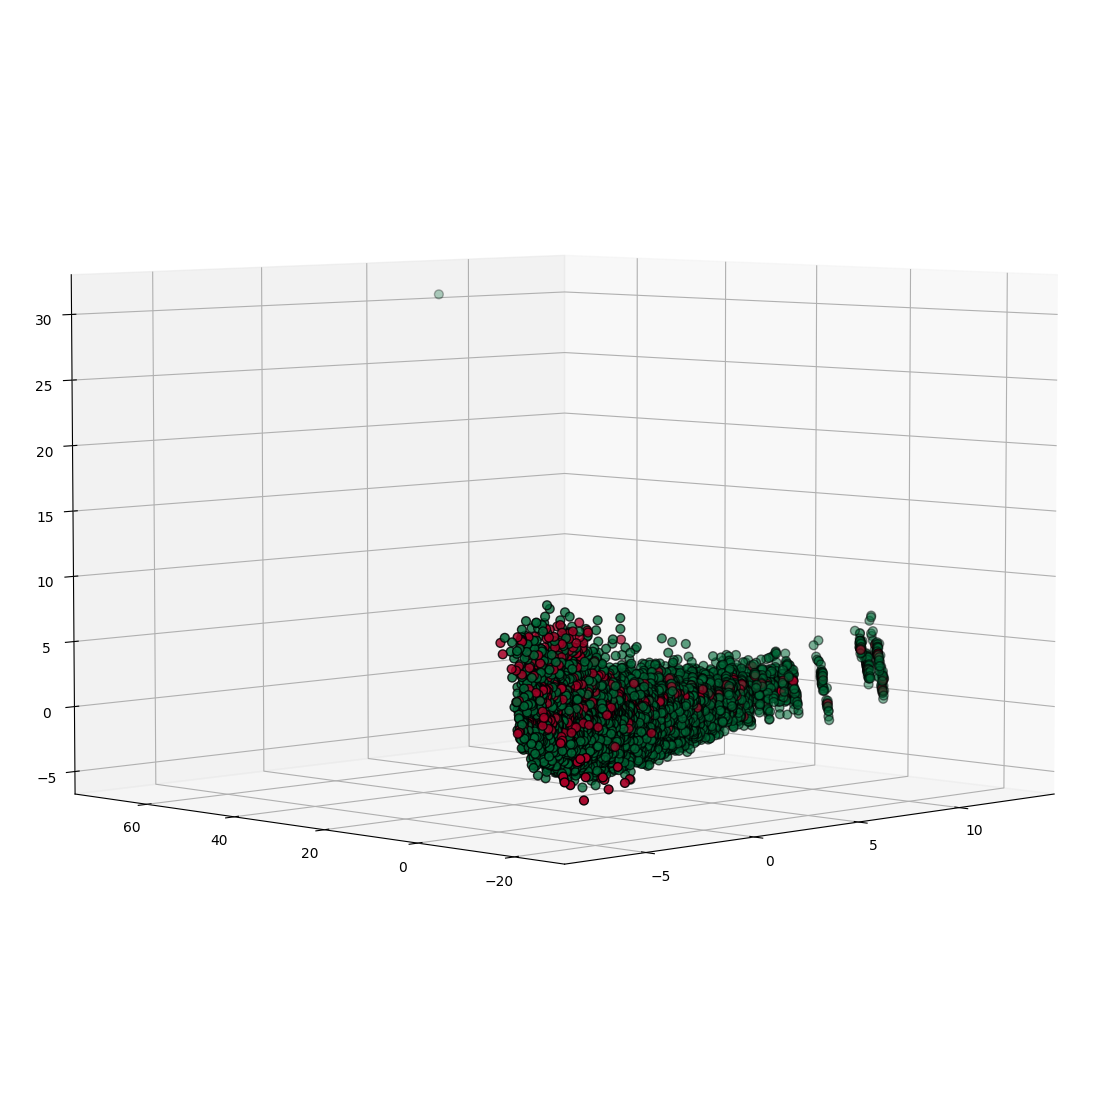

In [24]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig,rect=[0,0,.9,1],elev=5,azim=225)

fig.add_axes(ax)

x=result3d[0]
y=result3d[1]
z=result3d[2]

ax.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=40, c=fr['outcome'].astype(int))

plt.show()


In [25]:
result2d.to_csv('../data/2dpca.csv',index=False)
result3d.to_csv('../data/3dpca.csv',index=False)